In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import  (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score
)

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv("sales_data_sample.csv",encoding='latin')

In [5]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
my_df = df[['PRODUCTLINE', 'SALES']]


In [8]:
my_df

,PRODUCTLINE,SALES
0,Motorcycles,2871.00
1,Motorcycles,2765.90
2,Motorcycles,3884.34
3,Motorcycles,3746.70
4,Motorcycles,5205.27
...,...,...
2818,Ships,2244.40
2819,Ships,3978.51
2820,Ships,5417.57
2821,Ships,2116.16


In [9]:
# city_enc=LabelEncoder()
# my_df['CITY']=city_enc.fit_transform(my_df['CITY'])
# DealS_enc=LabelEncoder()
# my_df["DEALSIZE"]=DealS_enc.fit_transform(my_df["DEALSIZE"])
Prodline_enc=LabelEncoder()
my_df["PRODUCTLINE"]=Prodline_enc.fit_transform(my_df["PRODUCTLINE"])


C:\Users\sarve\AppData\Local\Temp\ipykernel_2744\867363025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["PRODUCTLINE"]=Prodline_enc.fit_transform(my_df["PRODUCTLINE"])


In [10]:
my_df

,PRODUCTLINE,SALES
0,1,2871.00
1,1,2765.90
2,1,3884.34
3,1,3746.70
4,1,5205.27
...,...,...
2818,3,2244.40
2819,3,3978.51
2820,3,5417.57
2821,3,2116.16


In [11]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(my_df)

In [12]:
wcss = []
for i in range(1, 20):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

In [13]:
wcss

[5645.999999999999,
 3209.2075645104765,
 1885.1821989757668,
 1488.6646546403936,
 1052.4736121924377,
 914.5403328151012,
 709.3171338812494,
 597.5657979412725,
 576.7547749089379,
 473.6633540877632,
 406.90059581114025,
 378.95954148917156,
 347.56739053905903,
 338.340977691114,
 294.9743762015301,
 290.98970536472984,
 263.2405669457801,
 241.77737864638584,
 229.27912553008278]

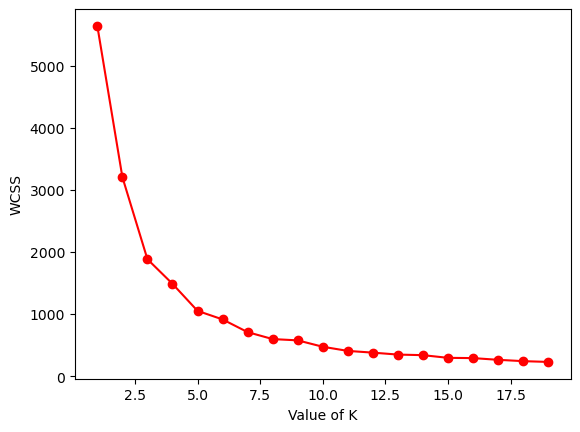

In [14]:
plt.plot(range(1, 20), wcss, 'ro-')
plt.xlabel("Value of K")
plt.ylabel("WCSS")
plt.show()

In [17]:
model = KMeans(n_clusters=3, init='k-means++')
clusters = model.fit_predict(scaled_values)
clusters

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [18]:
my_df['cluster'] = clusters

C:\Users\sarve\AppData\Local\Temp\ipykernel_2744\2380170346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['cluster'] = clusters


In [19]:
my_df

,PRODUCTLINE,SALES,cluster
0,1,2871.00,1
1,1,2765.90,1
2,1,3884.34,1
3,1,3746.70,1
4,1,5205.27,0
...,...,...,...
2818,3,2244.40,1
2819,3,3978.51,1
2820,3,5417.57,0
2821,3,2116.16,1


In [20]:
model.inertia_


1858.223460907697

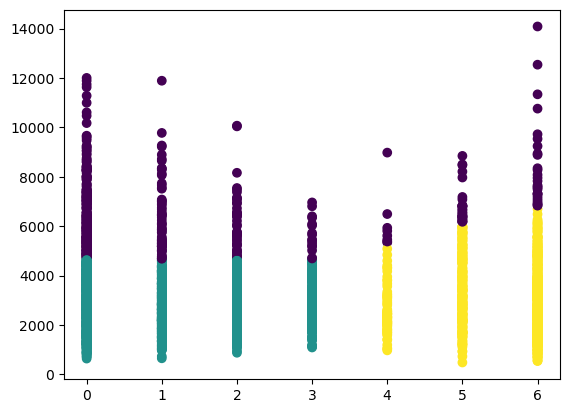

In [21]:
plt.scatter(my_df['PRODUCTLINE'], df['SALES'], c=my_df['cluster'])
plt.show()